# 2021/11/12
# 本代码使用GPCP TRMM绘制降水图
# 论文用图

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [81]:
gpcp_prect   =  xr.open_dataset("/home/sun/data/gpcp_prect_365_climate.nc")
trmm_prect   =  xr.open_dataset("/home/sun/data/trmm_prect_365_climate.nc")
time_slice  =  slice(100,201)
lat_slice   =  slice(10,20)
lon_slice   =  slice(55,145)
gpcp        =  gpcp_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)
trmm        =  trmm_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)

# 计算区域平均

In [82]:
np.set_printoptions(suppress=True)
#Compute weights and take weighted average over latitude dimension
weights_gpcp  =  np.cos(np.deg2rad(gpcp.lat.values))
weights_trmm  =  np.cos(np.deg2rad(trmm.lat.values))

avg_gpcp  =  (gpcp*weights_gpcp[None, :, None]).sum(dim='lat')/np.sum(weights_gpcp)
avg_trmm  =  (trmm*weights_trmm[None, None, :]).sum(dim='lat')/np.sum(weights_trmm)

# 定一下时间坐标

In [83]:
# 设置时间坐标
y_tick = [100,110,120,130,140,150,161,171,181,191,201]
y_label = ['10Apr','20Apr','30Apr','10May','20May','30May','10Jun','20Jun','30Jun','10Jul','20Jul']

/tmp/ipykernel_1652766/2530144563.py:43: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')


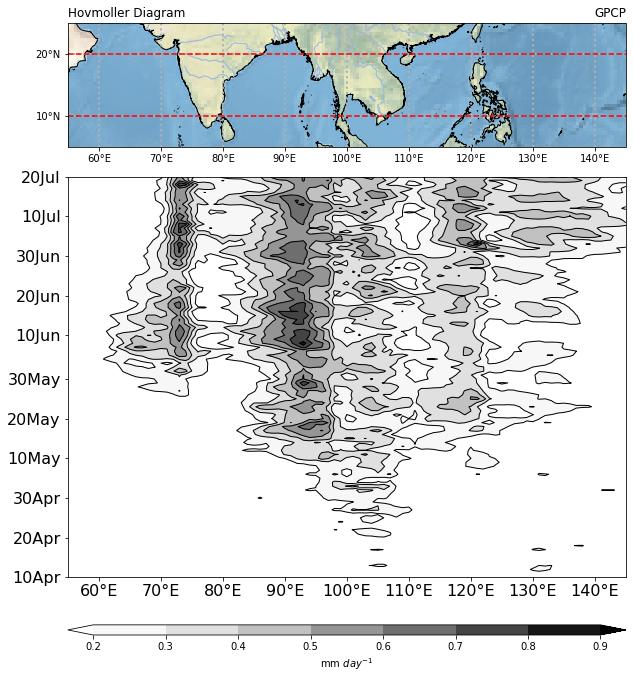

In [84]:
# Start figure
fig = plt.figure(figsize=(10, 13))
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([55, 145, 5, 25], ccrs.PlateCarree())
ax1.set_yticks([10, 20])
ax1.set_yticklabels([u'10\N{DEGREE SIGN}N', u'20\N{DEGREE SIGN}N'])
ax1.set_xticks(np.linspace(60,140,9))
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.05)
ax1.add_feature(cfeature.RIVERS)
ax1.add_feature(cfeature.LAKES)
ax1.stock_img()

# 地图上加红线
ax1.plot([55,145],[10,10],color='red',linestyle='dashed')
ax1.plot([55,145],[20,20],color='red',linestyle='dashed')

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('GPCP', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
#ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(4.8,21.6,8)/24
cf   = ax2.contourf(gpcp.lon.values, gpcp.time.values, avg_gpcp/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(gpcp.lon.values,  gpcp.time.values, avg_gpcp/24, clevs, colors='k', linewidths=1)
cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=16)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

!mkdir -p /home/sun/paint/lunwen
plt.savefig("/home/sun/paint/lunwen/gpcp_prect_hov.pdf",dpi=600)
plt.show()

/tmp/ipykernel_1652766/3806709605.py:43: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')


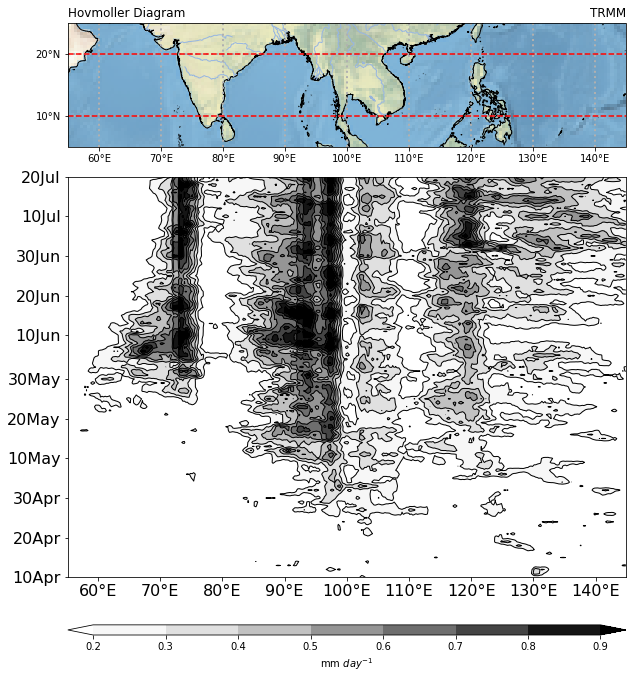

In [85]:
# Start figure
fig = plt.figure(figsize=(10, 13))
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")

# Top plot for geographic reference (makes small map)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([55, 145, 5, 25], ccrs.PlateCarree())
ax1.set_yticks([10, 20])
ax1.set_yticklabels([u'10\N{DEGREE SIGN}N', u'20\N{DEGREE SIGN}N'])
ax1.set_xticks(np.linspace(60,140,9))
ax1.set_xticklabels(x_tick_labels)
ax1.grid(linestyle='dotted', linewidth=2)

# Add geopolitical boundaries for map reference
ax1.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.05)
ax1.add_feature(cfeature.RIVERS)
ax1.add_feature(cfeature.LAKES)
ax1.stock_img()

# 地图上加红线
ax1.plot([55,145],[10,10],color='red',linestyle='dashed')
ax1.plot([55,145],[20,20],color='red',linestyle='dashed')

# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('TRMM', loc='right')

# Bottom plot for Hovmoller diagram
ax2 = fig.add_subplot(gs[1, 0])
#ax2.invert_yaxis()  # Reverse the time order to do oldest first

# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(4.8,21.6,8)/24
cf   = ax2.contourf(trmm.lon.values, trmm.time.values, avg_trmm/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(trmm.lon.values,  trmm.time.values, avg_trmm/24, clevs, colors='k', linewidths=1)
cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=16)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/trmm_prect_hov.pdf",dpi=600)
plt.show()

In [64]:
np.linspace(4.8/24,21.6/24,8)

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [53]:
np.linspace(2.4,21.6,9)

array([ 2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6])

In [54]:
24*0.2

4.800000000000001

In [55]:
np.linspace(2.4,21.6,9)/24

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])